### Bangalore has more thank 12 thousand restaurants and this number is incresing day by day!!! This notebook is an attempt to find various interesting facts like best restaurants, localities with most restaurants and many such things using zomato restaurant data. 

In [26]:
import pandas as pd # data processing, CSV file I/O
import numpy as np # linear algebra
import seaborn as sns #plotting
import matplotlib.pyplot as plt #plotting
from matplotlib import rcParams

In [27]:
data = pd.read_csv('/home/mis/Downloads/Extra/zomato.csv') # reading the data

In [28]:
data.sort_values('name').head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
4321,https://www.zomato.com/bangalore/feeltheroll-b...,"Opposite Mantri Commercio, Outer Ring Road, De...",#FeelTheROLL,No,No,3.4/5,7,+91 9108342079\r\n+91 9886117901,Bellandur,Quick Bites,NaN,Fast Food,200,"[('Rated 5.0', ""RATED\n Had an egg chicken ro...",[],Delivery,Bellandur
49511,https://www.zomato.com/bangalore/feeltheroll-b...,"Opposite Mantri Commercio, Outer Ring Road, De...",#FeelTheROLL,No,No,3.4 /5,7,+91 9108342079\n+91 9886117901,Bellandur,Quick Bites,NaN,Fast Food,200,"[('Rated 5.0', ""RATED\n Had an egg chicken ro...",[],Delivery,Sarjapur Road
11096,https://www.zomato.com/bangalore/l-81-cafe-hsr...,"Sector 6, HSR Layout, HSR",#L-81 Cafe,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Dine-out,BTM
29004,https://www.zomato.com/bangalore/l-81-cafe-hsr...,"Sector 6, HSR Layout, HSR",#L-81 Cafe,Yes,No,3.9 /5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Dine-out,Koramangala 4th Block
28099,https://www.zomato.com/bangalore/l-81-cafe-hsr...,"Sector 6, HSR Layout, HSR",#L-81 Cafe,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Delivery,Koramangala 4th Block


In [29]:
data.shape # shape of the data

(51717, 17)

In [30]:
data=data.groupby(['name','location']).first().reset_index()

In [31]:
print("Percentage null or na values in df")
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)

Percentage null or na values in df


name                            0.00
location                        0.00
url                             0.00
address                         0.00
online_order                    0.00
book_table                      0.00
rate                           18.04
votes                           0.00
phone                           1.94
rest_type                       0.40
dish_liked                     62.18
cuisines                        0.07
approx_cost(for two people)     0.38
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
dtype: float64

In [32]:
# replacing wrong values with nan and dropping it
data.rate = data.rate.replace("NEW", np.nan)
data.dropna(how ='any', inplace = True)

In [33]:
#deleting the unneccessary columns and renaming the required columns with better names
data.drop(['url','address','phone','listed_in(city)','menu_item','reviews_list','dish_liked','listed_in(type)'],axis=1,inplace=True)
data.rename(columns={'approx_cost(for two people)': 'average_cost', 'location': 'locality'}, inplace=True)
data.head()

,name,locality,online_order,book_table,rate,votes,rest_type,cuisines,average_cost
1,#L-81 Cafe,HSR,Yes,No,3.9/5,48,Quick Bites,"Fast Food, Beverages",400
3,#refuel,Bannerghatta Road,Yes,No,3.7/5,37,Cafe,"Cafe, Beverages",400
6,1000 B.C,Koramangala 5th Block,Yes,No,3.2/5,49,Quick Bites,"Arabian, Sandwich, Rolls, Burger",300
7,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,BTM,No,No,3.7/5,41,Casual Dining,"Biryani, North Indian",450
9,1131 Bar + Kitchen,Indiranagar,No,Yes,4.6/5,2785,"Bar, Casual Dining","Continental, Asian, Italian, North Indian","1,500"


In [34]:
X = data
X.rate = X.rate.astype(str)
X.rate = X.rate.apply(lambda x: x.replace('/5',''))
X.rate = X.rate.apply(lambda x: float(x))
X.head()
len(X)

4481

### Localities with highest number of restautants 

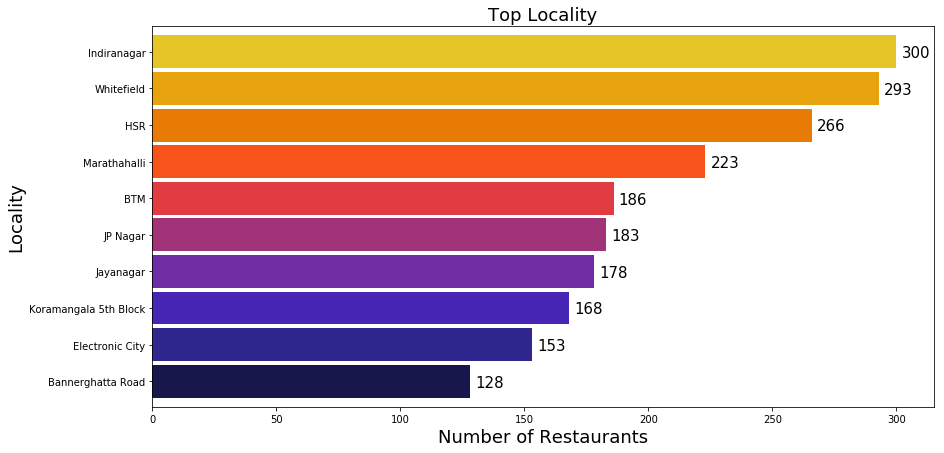

In [35]:
top_locality =X.groupby('locality')['name'].count().reset_index().sort_values('name',ascending=False).head(10).set_index('locality')
plt.subplots(figsize=(14,7))
ax = top_locality['name'].sort_values().plot.barh(width=0.9,color=sns.color_palette('CMRmap',12))
ax.set_xlabel("Number of Restaurants", fontsize=18)
ax.set_ylabel("Locality", fontsize=18)
ax.set_title("Top Locality",fontsize=18,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+2, i.get_y()+.3,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

#### As expected localities like Indiranagar,Whitefield and HSR have most number of restaurants.

### Top 10 restaurant types 

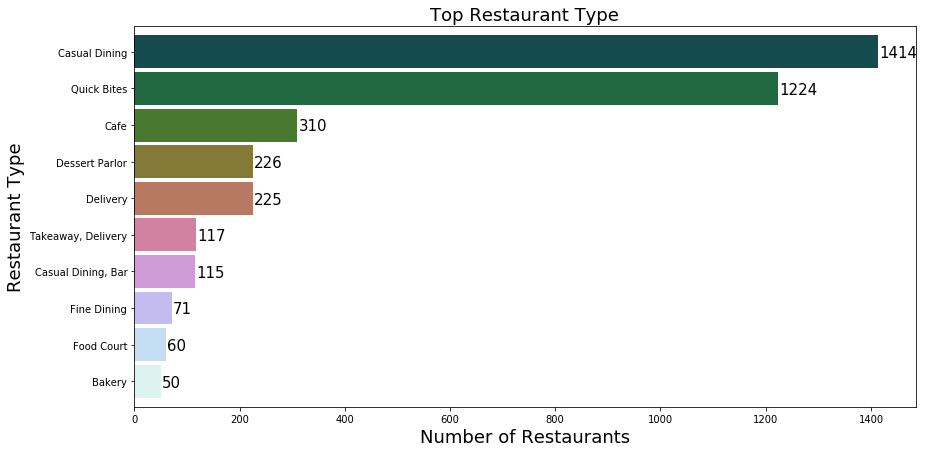

In [36]:
top_rest_type =X.groupby('rest_type')['name'].count().reset_index().sort_values('name',ascending=False).head(10).set_index('rest_type')
plt.subplots(figsize=(14,7))
ax = top_rest_type['name'].sort_values().plot.barh(width=0.9,color=sns.color_palette('cubehelix_r',12))
ax.set_xlabel("Number of Restaurants", fontsize=18)
ax.set_ylabel("Restaurant Type", fontsize=18)
ax.set_title("Top Restaurant Type",fontsize=18,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+2, i.get_y()+.3,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

#### Casual dining and quick bites restaurant types are most in bangalore.

### Availability of online order 

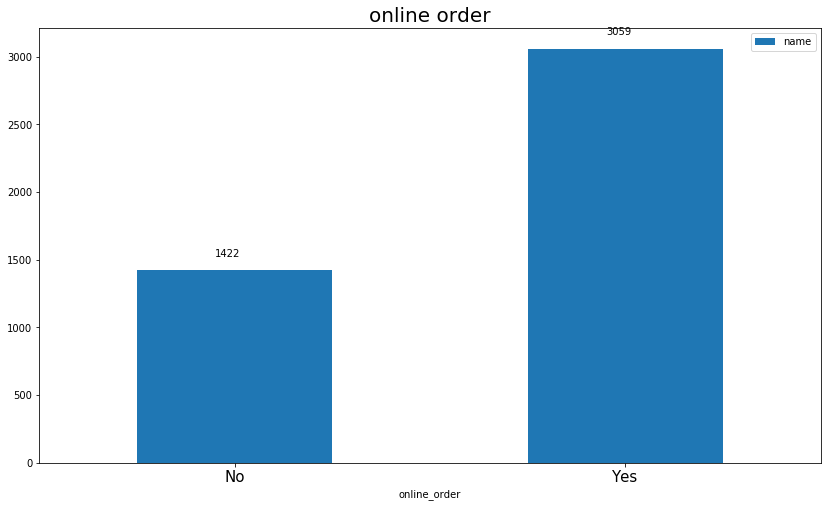

In [37]:
ax =X.groupby('online_order')['name'].count().reset_index().set_index('online_order').plot.bar(figsize=(14,8),rot=0)
plt.title('online order',fontsize=20)
plt.xticks(fontsize=15)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+.2,p.get_height()+100))

#### Is there a relation between online order option and rating of the restaurant?

### Online order vs rating 

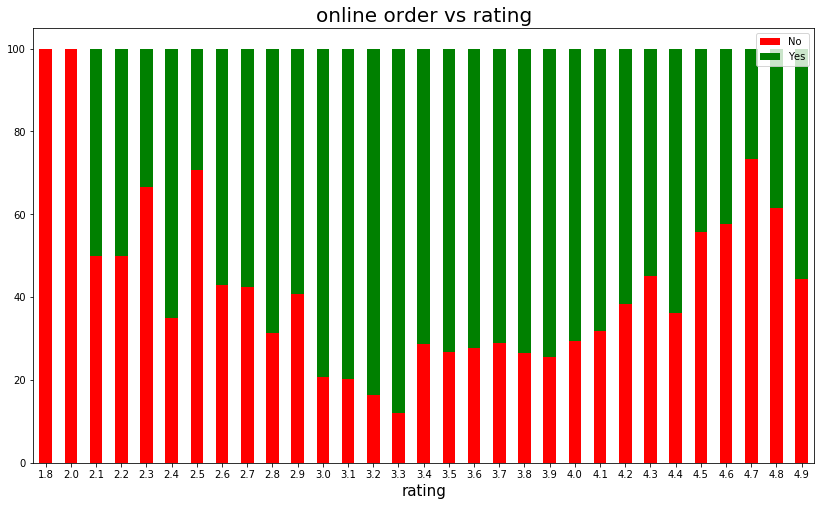

In [38]:
plt.rcParams['figure.figsize'] = (14, 8)
x = pd.crosstab(X['rate'], X['online_order'])
x.div(x.sum(axis=1).div(100).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','green'],rot=0)
plt.title('online order vs rating', fontsize = 20)
plt.xlabel('rating',fontsize=15)
plt.legend(loc="upper right")
plt.show()

#### You are more likely to receive a higher rating if your restaurant offers online order option.

### Availability of table booking 

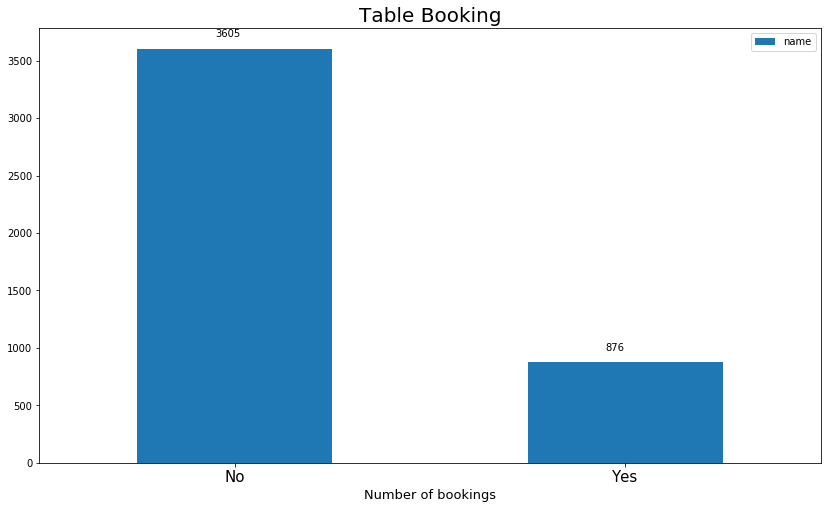

In [39]:
ax =X.groupby('book_table')['name'].count().reset_index().set_index('book_table').plot.bar(figsize=(14,8),rot=0)
plt.xlabel('Number of bookings',fontsize=13)
plt.title('Table Booking',fontsize=20)
plt.xticks(fontsize=15)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+.2,p.get_height()+100))

#### Is there a relation between table booking option and rating of the restaurant?

### Table booking vs rating

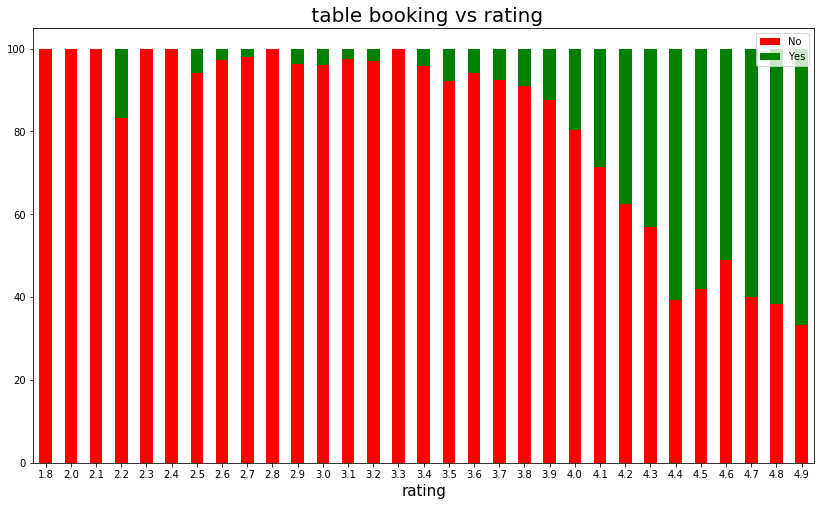

In [40]:
plt.rcParams['figure.figsize'] = (14, 8)
x = pd.crosstab(X['rate'], X['book_table'])
x.div(x.sum(axis=1).div(100).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','green'],rot=0)
plt.title(' table booking vs rating', fontsize = 20)
plt.xlabel('rating',fontsize=15)
plt.legend(loc="upper right")
plt.show()

#### You can say that you have the table booking option for Highly rated restaurants.

###  Average cost distribution of all restaurants 

Text(0.5, 0, 'Average Cost')

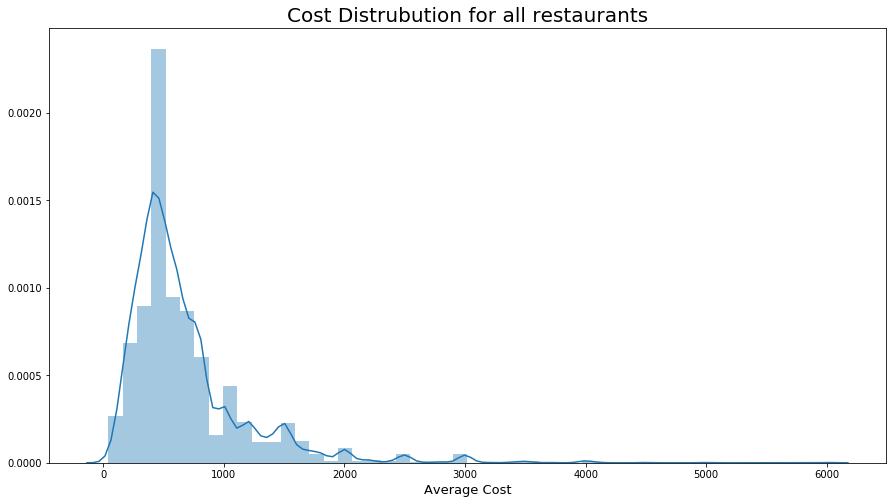

In [41]:
X.average_cost = X.average_cost.apply(lambda x: x.replace(',',''))
X.average_cost = X.average_cost.astype(int)
fig, ax = plt.subplots(figsize=[15,8])
sns.distplot(X['average_cost'],ax=ax)
ax.set_title('Cost Distrubution for all restaurants',fontsize=20)
ax.set_xlabel('Average Cost',fontsize=13)

### Highly rated most economical restaurants 

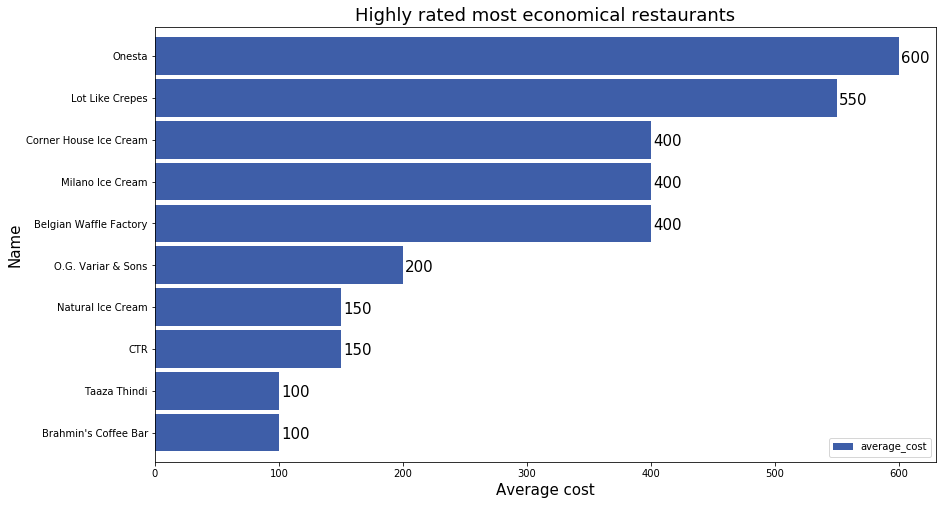

In [60]:
economical_restaurants =X[X['average_cost'] < 1500]
economical_restaurants =economical_restaurants[economical_restaurants['rate']>4.5]
economical_restaurants =economical_restaurants[economical_restaurants['votes']>500]
economical_restaurants =economical_restaurants.sort_values(['average_cost','rate'],ascending=[True,False]).head(10)
economical_restaurants =economical_restaurants[['name','average_cost']]
#plt.subplots(figsize=(14,7))
ax = economical_restaurants.sort_values('average_cost').set_index('name').plot.barh(width=0.9,color=sns.color_palette('RdYlBu_r',15))
ax.set_xlabel("Average cost", fontsize=15)
ax.set_ylabel("Name", fontsize=15)
ax.set_title("Highly rated most economical restaurants",fontsize=18,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+2, i.get_y()+.3,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

### Highly rated most expensive restaurants  

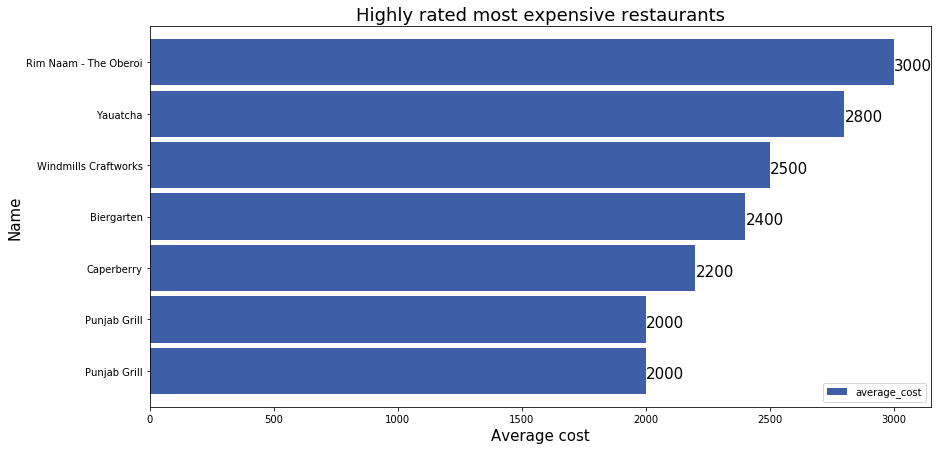

In [73]:
expensive_restaurants =X[X['average_cost']>=2000]
expensive_restaurants =expensive_restaurants[expensive_restaurants['rate']>4.5]
expensive_restaurants =expensive_restaurants[expensive_restaurants['votes']>500]
expensive_restaurants =expensive_restaurants.sort_values(['average_cost','rate'],ascending=[True,False]).head(10)
expensive_restaurants =expensive_restaurants[['name','average_cost']]
ax = expensive_restaurants.sort_values('average_cost').set_index('name').plot.barh(figsize=(14,7),width=0.9,color=sns.color_palette('RdYlBu_r',15))
ax.set_xlabel("Average cost", fontsize=15)
ax.set_ylabel("Name", fontsize=15)
ax.set_title("Highly rated most expensive restaurants",fontsize=18,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+2, i.get_y()+.3,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

### Most expensive restaurants 

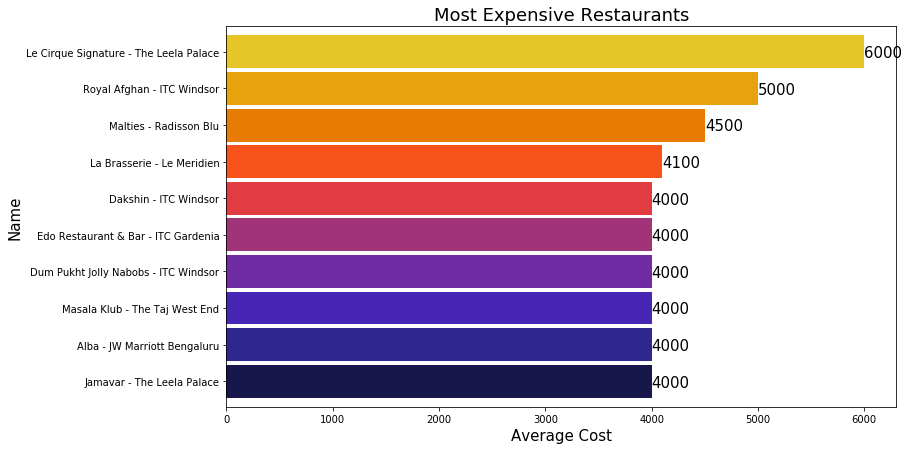

In [45]:
most_expensive_restaurants= X.sort_values('average_cost',ascending=False).head(10).set_index('name')
plt.subplots(figsize=(12,7))
ax = most_expensive_restaurants['average_cost'].sort_values().plot.barh(width=0.9,color=sns.color_palette('CMRmap',12))
ax.set_xlabel("Average Cost", fontsize=15)
ax.set_ylabel("Name", fontsize=15)
ax.set_title("Most Expensive Restaurants",fontsize=18,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+2, i.get_y()+.3,str(round(i.get_width())), fontsize=15,color='black')
plt.show()